In [78]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston, load_iris


In [79]:
boston = load_boston()
#find the dic keys
print(boston.keys())


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


/Users/michaeldionne/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

We get the keys such as data, target, feature_names, DESCR, and filename
The first two keys 'data' and 'target' has the only actual data, rest serve a descriptive purpose
data has all the input features of the dataset in a NumPy array and target has the output feature based on which we do the
prediction. target is in the NumPy array
feature_names has all the column names of the dataset in a NumPy array and DESCR is the description of the dataset filename
that has the file path in CSV format

In [80]:
#Find features and target
x = boston.data
y = boston.target
columns = boston.feature_names
columns


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [81]:
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [82]:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df["MEDV"] = y
boston_df_o = boston_df
print(boston_df.shape)
print(boston_df_o.shape)


(506, 14)
(506, 14)


boston_df has 506 rows and 14 columns

In [83]:
print(boston_df.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [84]:
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

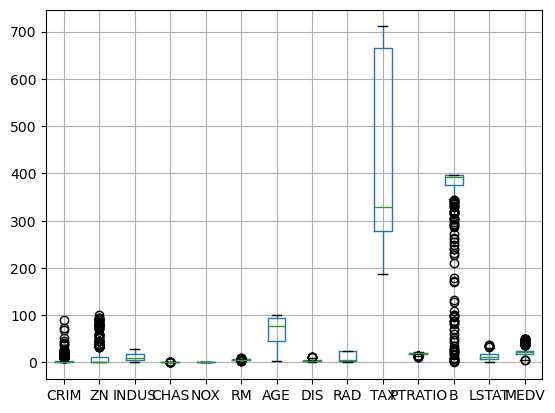

In [85]:
boston_df.boxplot()


Observations:
Since the values are different from each other, it is not right to put every column in the same scale of measurement
Let's import the libraries like matplotlib and seaborn
Matplotlib is a data visualizing and graphical plotting library for Python
Seaborn is also a data visualization library built on top of Matplotlib, which is used for making statistical graphics

<AxesSubplot:xlabel='DIS'>

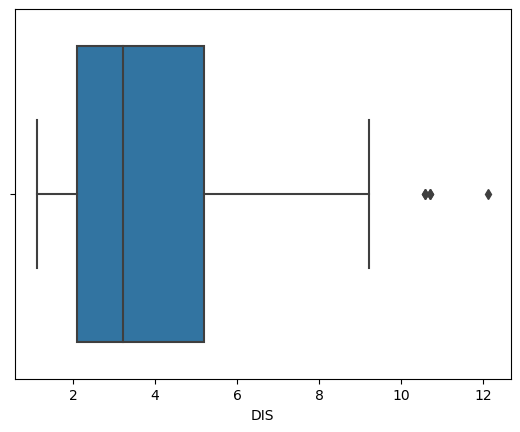

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x=boston_df['DIS'])


In [87]:
#IQR (Interquartile range ) technique for outlier treatment
def outlier_treatment(col):
    sorted(col)
    Q1,Q3 = np.percentile(col , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range


In this technique, we divide our dataset under percentiles like 25th and 75th of a sample
After that, we find the IQR between these two percentiles
Now, to remove the outliers, we calculate the lower and upper range by using the given formula
All the values which are beyond these ranges are considered outliers and must be removed

In [88]:
lower_range,upper_range = outlier_treatment(boston_df['DIS'])
print("Lower Range:",lower_range)
print("Upper Range:",upper_range)


Lower Range: -2.5322000000000005
Upper Range: 9.820800000000002


In [89]:
lower_boston_df = boston_df[boston_df["DIS"].values < lower_range]
lower_boston_df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [90]:
upper_boston_df = boston_df[boston_df["DIS"].values > upper_range]
upper_boston_df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4.0,411.0,18.3,370.78,5.49,24.1
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4.0,411.0,18.3,392.33,7.79,18.6
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5.0,187.0,17.0,384.46,4.50,30.1
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05,18.2
355,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57,20.6


Observations:
There are no rows that are lesser than the lower range, but there are five rows that are greater than our upper range

In [91]:
lower_outliers = lower_boston_df.value_counts().sum(axis=0)
upper_outliers = upper_boston_df.value_counts().sum(axis=0)
total_outliers = lower_outliers + upper_outliers
print("Total Number of Outliers:",total_outliers)


Total Number of Outliers: 5


In [92]:
lower_index = list(boston_df[ boston_df['DIS'] < lower_range ].index)
upper_index = list(boston_df[ boston_df['DIS'] > upper_range ].index)
total_index = list(lower_index + upper_index)
print(total_index)


[351, 352, 353, 354, 355]


In [93]:
# drop the outlier rows
print("Shape Before Dropping Outlier Rows:", boston_df.shape)
boston_df.drop(total_index, inplace = True)
print("Shape After Dropping Outlier Rows:", boston_df.shape)


Shape Before Dropping Outlier Rows: (506, 14)
Shape After Dropping Outlier Rows: (501, 14)


In the given code, we checked the shape of the dataset before and after dropping outliers rows
You can see that the rows before dropping the outliers were 506 and after dropping it became 501. Thus, we have successfully
dropped the unwanted rows

In [94]:
print(boston_df.mean())


CRIM         3.648951
ZN          10.738523
INDUS       11.229521
CHAS         0.069860
NOX          0.556123
RM           6.285898
AGE         68.996008
DIS          3.723699
RAD          9.602794
TAX        408.964072
PTRATIO     18.444910
B          356.428443
LSTAT       12.716667
MEDV        22.534930
dtype: float64


In [95]:
# check the skewness of the data
boston_df.skew(axis = 0, skipna = True)


CRIM       5.199083
ZN         2.333143
INDUS      0.286236
CHAS       3.384961
NOX        0.724482
RM         0.399880
AGE       -0.624705
DIS        0.843752
RAD        0.989519
TAX        0.662769
PTRATIO   -0.814678
B         -2.871741
LSTAT      0.894723
MEDV       1.105009
dtype: float64

<AxesSubplot:>

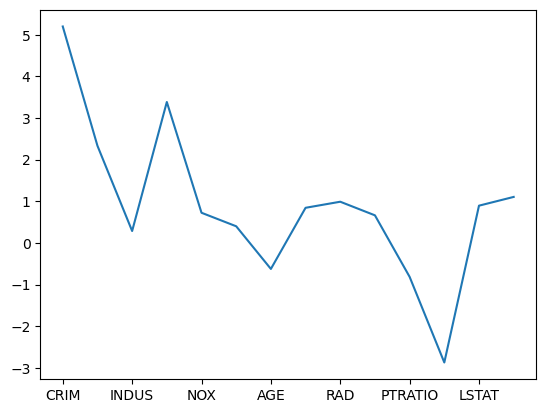

In [96]:
boston_df.skew(axis = 0, skipna = True).plot()


Correlation
Correlation is a statistical term that refers to how close two variables are to form a linear relationship with one another.
High correlation features are more linearly dependent and therefore have almost the same effect on the dependent variable. When
two features have a high correlation, we can drop one of them.

In [97]:
pearsoncorr = boston_df.corr(method='pearson')
pearsoncorr


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.197045,0.405070,-0.057085,0.419441,-0.220593,0.350953,-0.389244,0.624689,0.582689,0.293911,-0.384430,0.454222,-0.389168
ZN,-0.197045,1.000000,-0.522068,-0.036798,-0.506471,0.329664,-0.556961,0.632905,-0.307898,-0.313254,-0.424341,0.174996,-0.405733,0.374678
INDUS,0.405070,-0.522068,1.000000,0.059823,0.759689,-0.398559,0.637736,-0.710742,0.593388,0.723164,0.395794,-0.356755,0.599738,-0.489142
CHAS,-0.057085,-0.036798,0.059823,1.000000,0.088550,0.090968,0.083442,-0.095687,-0.009062,-0.036855,-0.120921,0.049561,-0.056617,0.175463
NOX,0.419441,-0.506471,0.759689,0.088550,1.000000,-0.307300,0.726982,-0.779518,0.609673,0.669190,0.197554,-0.379776,0.586774,-0.431362
RM,-0.220593,0.329664,-0.398559,0.090968,-0.307300,1.000000,-0.247881,0.223962,-0.211945,-0.292789,-0.352913,0.129013,-0.618199,0.694797
AGE,0.350953,-0.556961,0.637736,0.083442,0.726982,-0.247881,1.000000,-0.750649,0.452882,0.507512,0.275461,-0.272692,0.598830,-0.383383
DIS,-0.389244,0.632905,-0.710742,-0.095687,-0.779518,0.223962,-0.750649,1.000000,-0.504962,-0.552740,-0.264611,0.300387,-0.498097,0.265689
RAD,0.624689,-0.307898,0.593388,-0.009062,0.609673,-0.211945,0.452882,-0.504962,1.000000,0.911417,0.471650,-0.443783,0.486202,-0.383126
TAX,0.582689,-0.313254,0.723164,-0.036855,0.669190,-0.292789,0.507512,-0.552740,0.911417,1.000000,0.465659,-0.441691,0.543021,-0.468504


Observations:
The correlation coefficient value lies between -1 to +1.
The attributes closer to 1 are more positively correlated.
Values close to -1 are more negatively correlated.
We can see more detail about correlation in Heatmap with a better visualization.

Pearson Coefficient
The Pearson coefficient is a measure of the intensity and direction of a linear relationship between two variables that allows no
assumptions about causality. It represents correlation rather than causation and has a scale of +1 to -1, with +1 representing a positive
correlation, -1 representing a negative correlation, and 0 representing no relationship.

<AxesSubplot:>

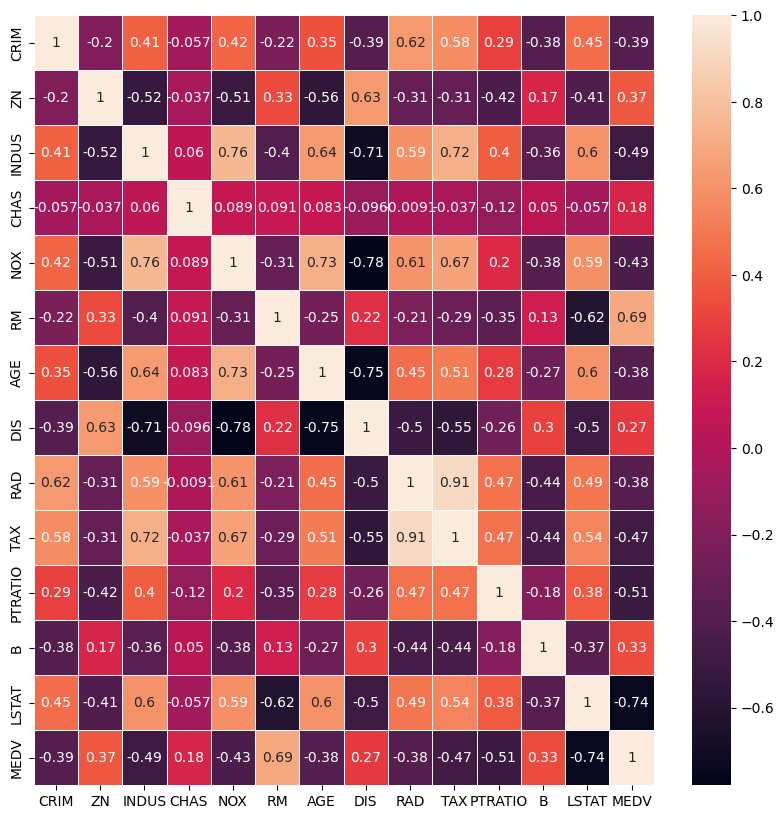

In [98]:
# We use method = pearson for the boston_df.corr for calculating the pearson coefficient of correlation.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize= (10,10), dpi=100)
#sns.heatmap(boston_df.corr(), annot=True)
sns.heatmap(pearsoncorr,
xticklabels=pearsoncorr.columns,
yticklabels=pearsoncorr.columns,
annot=True,
linewidth=0.5)


Heatmap Observations:
Each square represents the correlation between the variables on each axis, ranging from -1 to +1.
There is no linear relationship between the two variables when the values are close to zero.
The attributes closer to 1 are more positively correlated. If one increases, so does the other, and the closer they are to 1, the stronger
their relationship.
Values close to -1 are more negatively correlated. When one increases, the other decreases, and the closer they are to -1, the weaker
their relationship.
The diagonals are all 1 (light peach in color), as the squares are correlating each variable to itself (so it's a perfect correlation).
For the others, the larger the number and brighter the color, the stronger is the correlation between the two variables.
Since the same two variables are paired together in squares of the diagonal, the plot is therefore symmetrical around it.

In [99]:
#Correlation with output variable
cor_target = abs(pearsoncorr["MEDV"]) #Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features


RM         0.694797
PTRATIO    0.508040
LSTAT      0.740998
MEDV       1.000000
Name: MEDV, dtype: float64

Relative feature observations
The features RM, PTRATIO, and LSTAT are strongly correlated with the output variable MEDV (target variable) per above analysis.
As a result, we will remove all other features except these.
However, one of the assumptions of linear regression is that the independent variables are not correlated to one another.
If these variables are correlated with one another, we can hold just one and discard the others.

In [100]:
print(boston_df[["LSTAT","PTRATIO"]].corr())
print()
print(boston_df[["RM","PTRATIO"]].corr())
print()
print(boston_df[["RM","LSTAT"]].corr())


            LSTAT   PTRATIO
LSTAT    1.000000  0.381429
PTRATIO  0.381429  1.000000

               RM   PTRATIO
RM       1.000000 -0.352913
PTRATIO -0.352913  1.000000

             RM     LSTAT
RM     1.000000 -0.618199
LSTAT -0.618199  1.000000


Correlation observations:
From the above analysis, it is visible that the variables LSTAT and RM are highly correlated with each other (-0.618199). Hence, we will
keep only one variable and drop the other. We will keep LSTAT since its correlation with MEDV is higher than that of RM.
After dropping RM, we are left with two features, LSTAT and PTRATIO. These are the final features given by Pearson correlation

In [101]:
boston_df.drop(columns = ["RM"], inplace = True)


In [102]:
boston_df.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

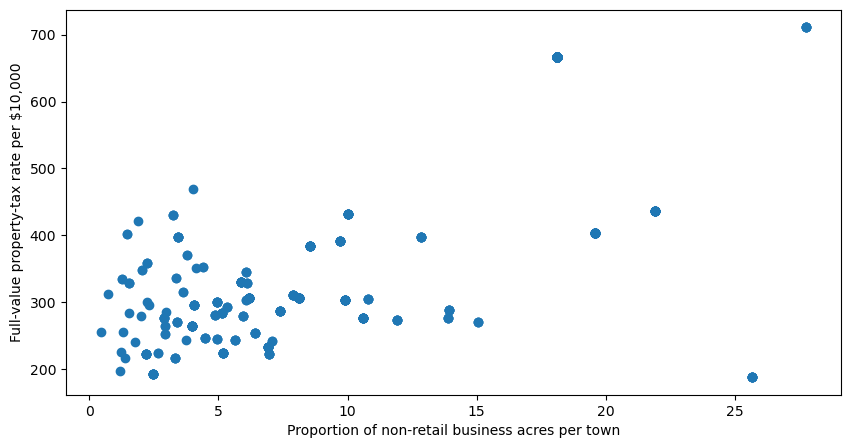

In [103]:
# multivariate outlier analysis
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()


Outliers detection using Z-Score
Z-score indicates how many standard deviations away a data point is
Standard deviation measures the amount of variation of a set of values from its mean
We can drop the rows which lie beyond our threshold, i.e., z=3

In [104]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
print(z)


         CRIM        ZN     INDUS      CHAS       NOX       AGE       DIS  \
0    0.422165  0.322399  1.307044  0.274057  0.156980  0.135909  0.184288   
1    0.419732  0.476775  0.609526  0.274057  0.754647  0.354595  0.625560   
2    0.419734  0.476775  0.609526  0.274057  0.754647  0.282702  0.625560   
3    0.419146  0.476775  1.326094  0.274057  0.849928  0.830491  1.176510   
4    0.414895  0.476775  1.326094  0.274057  0.849928  0.529744  1.176510   
..        ...       ...       ...       ...       ...       ...       ...   
501  0.415639  0.476775  0.102646  0.274057  0.146185  0.003723  0.626414   
502  0.417651  0.476775  0.102646  0.274057  0.146185  0.275828  0.722558   
503  0.415855  0.476775  0.102646  0.274057  0.146185  0.787813  0.782930   
504  0.410196  0.476775  0.102646  0.274057  0.146185  0.726948  0.671543   
505  0.417403  0.476775  0.102646  0.274057  0.146185  0.422621  0.613132   

          RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0    0.98

In [105]:
z.shape

(501, 13)

In [106]:
#We will now print the rows whose z value is greater than the threshold
threshold = 3
print(np.where(z > 3))


(array([ 55,  56,  57,  65,  66, 102, 141, 142, 152, 154, 155, 160, 162,
       163, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 208, 209,
       210, 211, 212, 216, 218, 219, 220, 221, 222, 234, 236, 254, 255,
       256, 269, 273, 274, 276, 277, 282, 283, 283, 284, 286, 290, 291,
       292, 347, 348, 351, 352, 353, 358, 359, 364, 365, 367, 368, 369,
       375, 393, 399, 400, 405, 405, 406, 407, 407, 409, 409, 410, 411,
       413, 413, 414, 418, 419, 420, 421, 422, 422, 424, 426, 431, 432,
       433, 440, 445, 449, 450, 451, 452, 461]), array([ 1,  1,  1,  1,  1, 10, 11,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  1,  1,  1,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  1,
        1,  1,  1,  1,  3,  3,  3,  3,  3,  3,  3,  3, 11, 11,  0,  0,  0,
        0,  0, 10, 10, 10, 11,  0, 11, 10, 10,  0, 10, 10, 10, 10, 10, 10,
        0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]))


In [107]:
#print(z[1][55])


In [108]:
boston_df_o = boston_df_o[(z < 3).all(axis=1)]


In [109]:
boston_df.shape

(501, 13)

In [110]:
boston_df_o.shape

(408, 13)

In [112]:
boston_df_o1 = boston_df


In [113]:
Q1 = boston_df_o1.quantile(0.25)
Q3 = boston_df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


CRIM         3.61046
ZN          12.50000
INDUS       12.91000
CHAS         0.00000
NOX          0.17100
AGE         48.40000
DIS          3.02850
RAD         20.00000
TAX        387.00000
PTRATIO      2.80000
B           20.91000
LSTAT        9.97000
MEDV         8.20000
dtype: float64


In [114]:
IQR["CRIM"]


3.61046

In [115]:
boston_df_o.shape


(408, 13)

In [116]:
# Custom function to find and remove outliers based on each column
def multi_outlier_treatment(data):
    columns = data.drop(columns=["MEDV"]).columns
    # Getting the names of each row except the target row for Analysis
    Q1 = boston_df_o1.quantile(0.25)
    Q3 = boston_df_o1.quantile(0.75)
    IQR = Q3 - Q1
    row_index_list = list()
    print()
    
    for col in columns:
        lower_range = Q1[col] - (1.5 * IQR[col])
        upper_range = Q3[col] + (1.5 * IQR[col])
        lower_data_df = data[data[col].values < lower_range]
        upper_data_df = data[data[col].values > upper_range]
        lower_outliers = lower_data_df.value_counts().sum(axis=0)
        upper_outliers = upper_data_df.value_counts().sum(axis=0)
        total_outliers = lower_outliers + upper_outliers
        print("Total Number of Outliers in "+str(col)+" column:",total_outliers)
        lower_index = list(data[ data[col] < lower_range ].index)
        upper_index = list(data[ data[col] > upper_range ].index)
        total_index = list(lower_index + upper_index)
        row_index_list = list(row_index_list + total_index)
    row_index_list = list(set(row_index_list))
    row_index_list.sort()
    total_rows_count = len(row_index_list)
    print()
    print("Total number of unique rows to delete:",total_rows_count)
    print()
    print("Unique rows to delete:\n", row_index_list)
    print()
    return data.drop(row_index_list)
    

In [117]:
print("Shape before dropping outlier rows:", boston_df_o.shape)
boston_df_o = multi_outlier_treatment(boston_df_o)
print("Shape after dropping outlier rows:", boston_df_o.shape)


Shape before dropping outlier rows: (408, 13)

Total Number of Outliers in CRIM column: 42
Total Number of Outliers in ZN column: 34
Total Number of Outliers in INDUS column: 0
Total Number of Outliers in CHAS column: 0
Total Number of Outliers in NOX column: 0
Total Number of Outliers in AGE column: 0
Total Number of Outliers in DIS column: 0
Total Number of Outliers in RAD column: 0
Total Number of Outliers in TAX column: 0
Total Number of Outliers in PTRATIO column: 12
Total Number of Outliers in B column: 44
Total Number of Outliers in LSTAT column: 0

Total number of unique rows to delete: 120

Unique rows to delete:
 [18, 25, 27, 32, 34, 39, 40, 54, 118, 134, 145, 146, 151, 153, 156, 165, 167, 168, 169, 170, 187, 188, 189, 190, 191, 192, 193, 194, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 275, 278, 285, 287, 288, 289, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 331, 332, 341, 343, 344, 349, 350, 366, 367, 371, 375, 376, 377, 378, 379, 381, 382, 384, 385, 3

The completed dataset, boston_df_o , can now be utilised to construct a model. As the dataset is so well-defined, the model will be
more accurate.

In [118]:
print(boston_df_o.isna().sum(axis=0))


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
